In [1]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import idendro

In [2]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)

In [3]:
import scipy.cluster.hierarchy as sch

In [15]:
linkage_matrix = sch.linkage(data['data'], method='single', metric='euclidean')
threshold = 0.6
flat_clusters = sch.fcluster(linkage_matrix, t=threshold, criterion='distance')

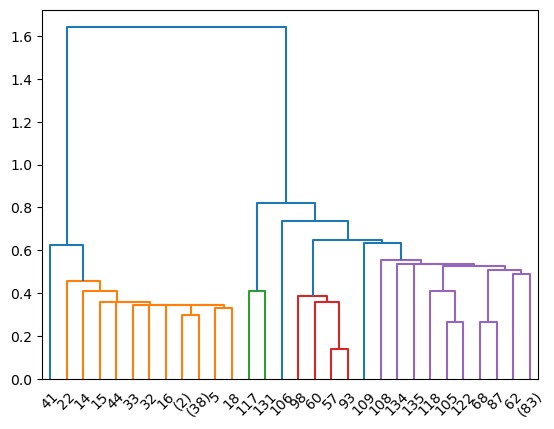

In [16]:
_ = sch.dendrogram(linkage_matrix, color_threshold=threshold, p = 10, truncate_mode = 'level')

In [17]:
#wrap clustering outputs / parameters into a container
cl_data = idendro.ClusteringData(linkage_matrix = linkage_matrix, cluster_assignments = flat_clusters, threshold = threshold)

#instantiate idendro object with default formatting
idd = idendro.IDendro()

#pass clustering information
idd.set_cluster_info(cl_data)

#create a dendrogram object
dendrogram = idd.create_dendrogram(truncate_mode='level', p=10)

In [18]:
#plot in Altair
from idendro.targets.altair import to_altair

to_altair(dendrogram=dendrogram, height=300, width=700)

alt.LayerChart(...)

In [30]:
#plot in plotly
from idendro.targets.plotly import to_plotly

a = to_plotly(dendrogram=dendrogram, width=700, height=450)

a.update_yaxes(range=[-0.1,2], zeroline=True)